In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
with open('datasets/exploration/svc_joined.pkl', 'rb') as f:
    data = pickle.load(f)

data.drop(columns=['label', 'Unnamed: 0'], inplace=True)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/exploration/svc_joined.pkl'

## Confusion Matrix

| Actual \ Predicted | World (0) | Sports (1) | Business (2) | Sci/Tech (3) |
|--------------------|---------|---------|---------|---------|
| World (0)          | 1810    | 77      | 97      | 63      |
| Sports (1)         | 18      | 1918    | 13      | 18      |
| Business (2)       | 67      | 16      | 1681    | 222     |
| Sci/Tech (3)       | 76      | 21      | 140     | 1763    |

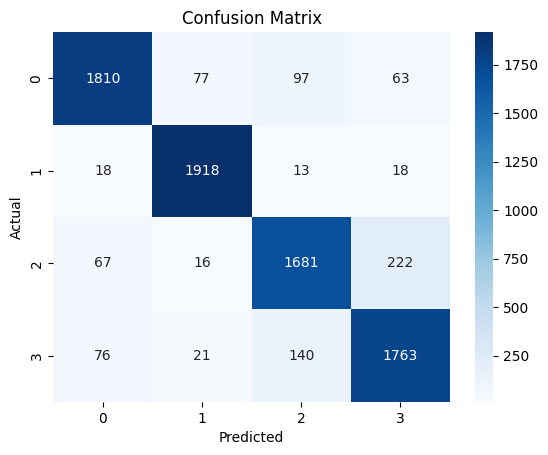

In [3]:

# Define the confusion matrix
confusion_matrix = np.array(
    [[1810,   77,   97,   63],
    [  18, 1918,   13,   18],
    [  67,   16, 1681,  222],
    [  76,   21,  140, 1763]]
)

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [1]:
labels = {
    0: 'World',
    1: 'Sports',
    2: 'Business',
    3: 'Sci/Tech'
}

grouped_df = data.groupby(['actual', 'predicted'])

for group_name, group in grouped_df:
    if labels[group_name[0]] == labels[group_name[1]]:
        continue
    print(f"Actual: {labels[group_name[0]]}, Predicted: {labels[group_name[1]]}")
    print(len(group))

NameError: name 'data' is not defined

## Vector View

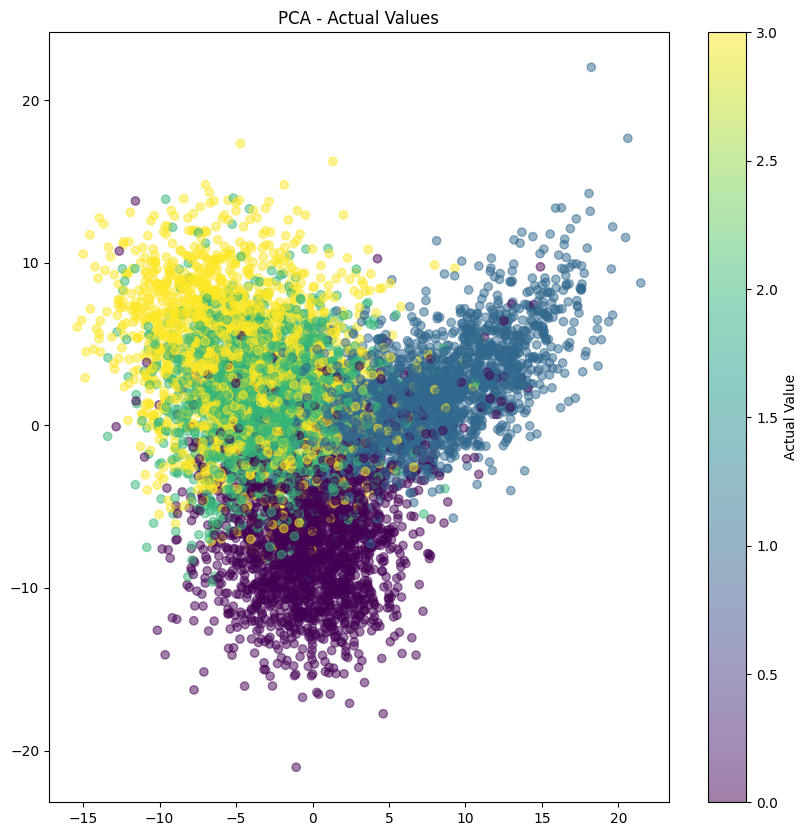

In [12]:

# Convert the padded embeddings back to a numpy array
embeddings = data['word_embeddings'].values
actual_values = data['actual'].values
predicted_values = data['predicted'].values

new_embeddings = []
for embedding in embeddings:
    new_list = []
    for entry in embedding:
        embedding_string = entry[1:-1]
        number_strings = embedding_string.split(', ')
        numbers = list(map(lambda x: float(x), number_strings))
        new_list.append(numbers)
        
    embed = np.mean(new_list, axis=0)  # Average the word embeddings
    new_embeddings.append(embed)

# print(new_embeddings)

# # Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(new_embeddings)

# Create a scatter plot with actual values as color
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=actual_values, cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Value')
plt.title('PCA - Actual Values')
plt.show()


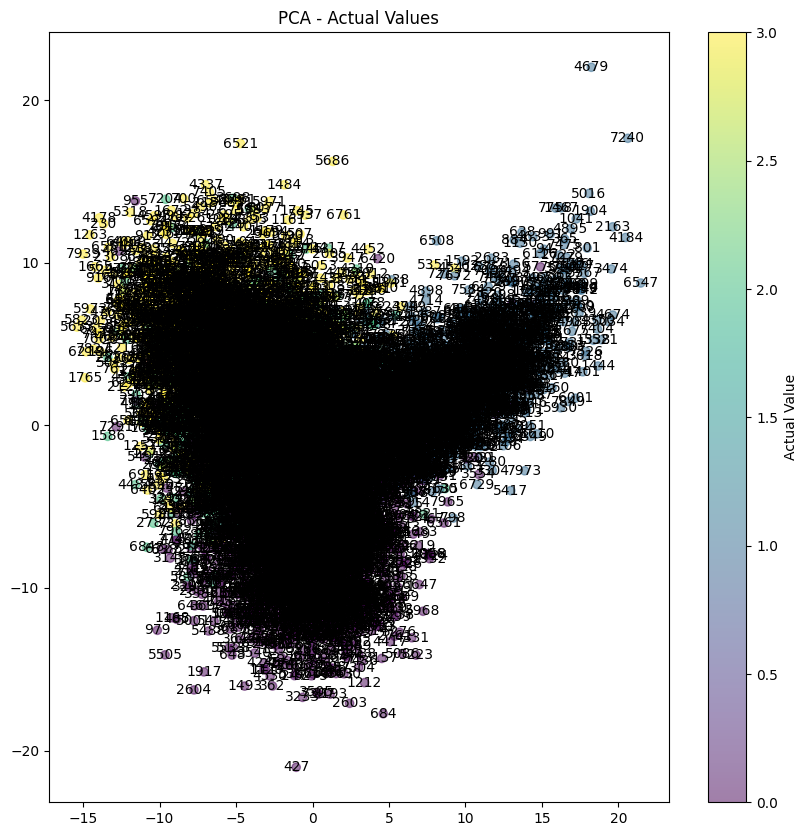

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=actual_values, cmap='viridis', alpha=0.5)

# Add IDs to each point
for i, txt in enumerate(range(len(actual_values))):
    plt.text(embeddings_pca[i, 0], embeddings_pca[i, 1], txt, ha='center', va='center')

plt.colorbar(label='Actual Value')
plt.title('PCA - Actual Values')
plt.show()

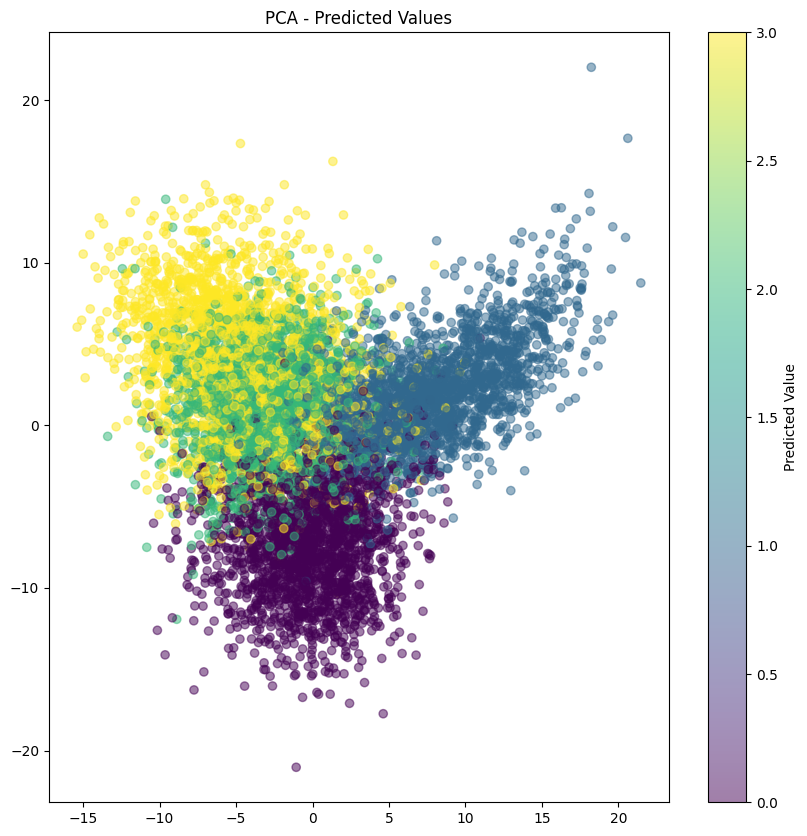

In [8]:
# Create a scatter plot with predicted values as color
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=predicted_values, cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Value')
plt.title('PCA - Predicted Values')
plt.show()